# Feature Engineering

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import math
import sys
sys.path.append('../src/')

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from gestureai import load_dataset

Using TensorFlow backend.


# Load Datasets

In [5]:
input_dim = 3
timesteps = 40
n_classes = 5
n_files_class = 200

In [6]:
X = load_dataset('../datasets/gesture-3axis-accel.tar.gz')

In [7]:
X.shape

(1000, 40, 3)

In [8]:
y = np.array([])
for i in range(n_classes):
    y = np.r_[y, [i] * n_files_class]

In [9]:
y.shape

(1000,)

---

# Representative Value

In [10]:
X_r = X.reshape(1000*40, 3)
X_r.shape

(40000, 3)

In [11]:
df = pd.DataFrame(X_r, columns=('x', 'y', 'z'))

In [12]:
df.describe()

,x,y,z
count,40000.0,40000.0,40000.0
unique,15380.0,15255.0,15502.0
top,0.0,0.0,0.0
freq,23500.0,23500.0,23500.0


In [13]:
df.mean()

x   -0.076494
y    0.075513
z   -0.374291
dtype: float64

In [14]:
df.var()

x    0.162671
y    0.132060
z    0.377073
dtype: float64

In [15]:
df.std()

x    0.403324
y    0.363401
z    0.614063
dtype: float64

## Square Root of Sum of Squares (SRSS)

In [16]:
squares = X_r[:,0] ** 2 + X_r[:,1] ** 2 + X_r[:,2] ** 2

In [17]:
srss = [math.sqrt(square) for square in squares]

In [18]:
np.mean(srss)

0.51135882757963258

In [19]:
np.var(srss)

0.56194647474713433

In [20]:
np.std(srss)

0.74963089233777869

---

# Plot sequence

In [21]:
def plot_3axis_seq(seq, title=''):
    plt.title(title)
    plt.grid()
    plt.xlabel('Time[ms]')
    plt.ylabel('Acceleration')
    plt.plot(seq[:,0], label='x')
    plt.plot(seq[:,1], label='y')
    plt.plot(seq[:,2], label='z')
    plt.legend()

In [22]:
def plot_srss_seq(index_class, title=''):
    start = index_class * n_classes * n_files_class
    end = index_class * n_classes * n_files_class + timesteps
    plt.title(title)
    plt.grid()
    plt.xlabel('Time[ms]')
    plt.ylabel('SRSS of Acceleration')
    plt.plot(srss[start:end], label='SRSS')
    plt.legend()

## 3-axis Sequence

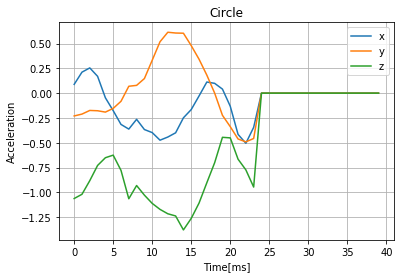

In [23]:
plot_3axis_seq(X[0 * n_files_class], title='Circle')

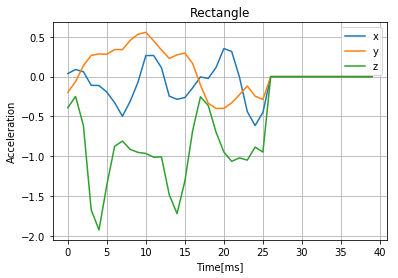

In [24]:
plot_3axis_seq(X[1 * n_files_class], title='Rectangle')

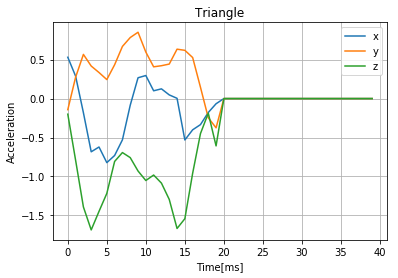

In [25]:
plot_3axis_seq(X[2 * n_files_class], title='Triangle')

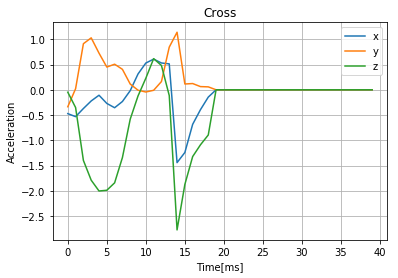

In [26]:
plot_3axis_seq(X[3 * n_files_class], title='Cross')

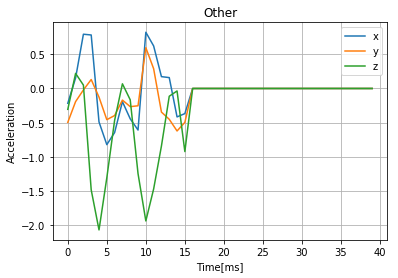

In [27]:
plot_3axis_seq(X[4 * n_files_class], title='Other')

## SRSS of Sequence

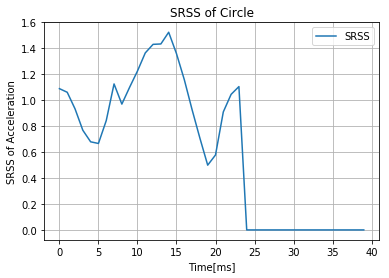

In [28]:
plot_srss_seq(0, title='SRSS of Circle')

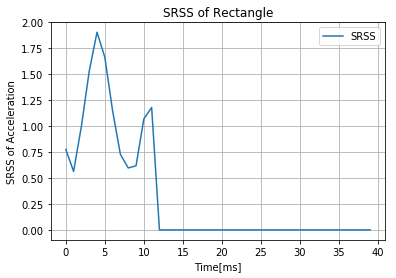

In [29]:
plot_srss_seq(1, title='SRSS of Rectangle')

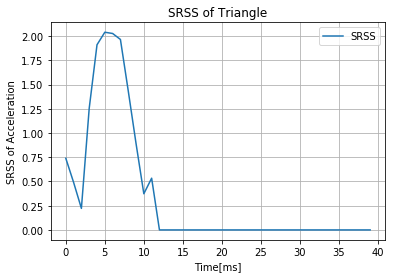

In [30]:
plot_srss_seq(2, title='SRSS of Triangle')

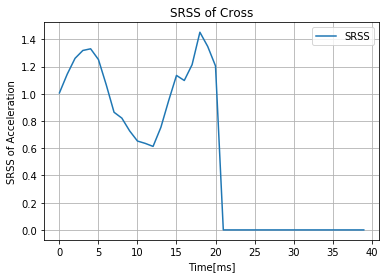

In [31]:
plot_srss_seq(3, title='SRSS of Cross')

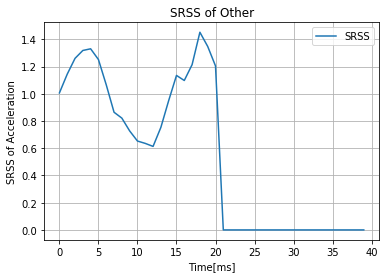

In [32]:
plot_srss_seq(3, title='SRSS of Other')

---